# 4) Bipartite Graphs.

In [15]:
import networkx as nx
from networkx.algorithms import bipartite
B = nx.Graph()

B.add_nodes_from(['A','B','C','D','E'], bipartite=0)
B.add_nodes_from([1,2,3,4], bipartite=1)
B.add_edges_from([('A',1) , ('B',1) , ('C',1),('C',3),('D',2),('E',3),
                   ('E',4)])

In [16]:
# 1: chexk if B is bipartite
print(bipartite.is_bipartite(B))

# Now,let's break the role by adding an edge between
# one of the separated sets ,then check:
B.add_edge('A','B')
print(bipartite.is_bipartite(B))

# lets remove this edge to keep it Bipartite:
B.remove_edge('A','B')
print(bipartite.is_bipartite(B))

True
False
True


In [17]:
X = set([1,2,3,4])
print(bipartite.is_bipartite_node_set(B,X))

X = set(['A','B','C','D','E'])
print(bipartite.is_bipartite_node_set(B,X))

X = set([1,2,3,4 ,'A'])
print(bipartite.is_bipartite_node_set(B,X))

# because it's not true that all the edges go from this set 1, 2, 3, 4, A,
# through the rest of the nodes, and so this would be false.

True
True
False


In [18]:
bipartite.sets(B)

({'A', 'B', 'C', 'D', 'E'}, {1, 2, 3, 4})

- So, if two people tend to follow the same teams, they may also like the same other type of product, and so you would be interested in knowing who is likely to impact whom in terms of that other product, and the fact that they follow the same kinds of teams might give you that hint, and so these this kind of network could be useful for certain things.

# The Projected Graphs.

In [19]:
# projected graph for Fans:
B = nx.Graph()
B.add_edges_from([('A',1),('B',1),('C',1),('D',1),('H',1),('B',2),
                 ('C',2),('D',2),('E',2),('G',2),('E',3),('F',3),
                 ('H',3),('J',3),('E',4),('I',4),('J',4)])

X = set(['A','B','C','D','E','F','G','H','I','J'])
p =bipartite.projected_graph(B,X)
p

In [20]:
# projected graph for Basketball Teams:
B = nx.Graph()
B.add_edges_from([('A',1),('B',1),('C',1),('D',1),('H',1),('B',2),
                 ('C',2),('D',2),('E',2),('G',2),('E',3),('F',3),
                 ('H',3),('J',3),('E',4),('I',4),('J',4)])

X = set([1,2,3,4])
p =bipartite.projected_graph(B,X)
p

Use NetworkX to construct the bipartite weighted graph projection of nodes A,B,C,D,E,F and find  the weight of the edge (A,C).

What is the weight of the edge (A,C)?

In [21]:
import networkx as nx
from networkx.algorithms import bipartite

B = nx.Graph()
B.add_edges_from([('A', 'G'),('A','I'), ('B','H'), ('C', 'G'), ('C', 'I'),('D', 'H'), ('E', 'I'), ('F', 'G'), ('F', 'J')])
X1 = set(['A', 'B', 'C', 'D', 'E', 'F'])


bipartite.weighted_projected_graph(B,X1)['A']['C']

{'weight': 2}

# 5) Loading Graphs in NetworkX.

<IPython.core.display.Javascript object>


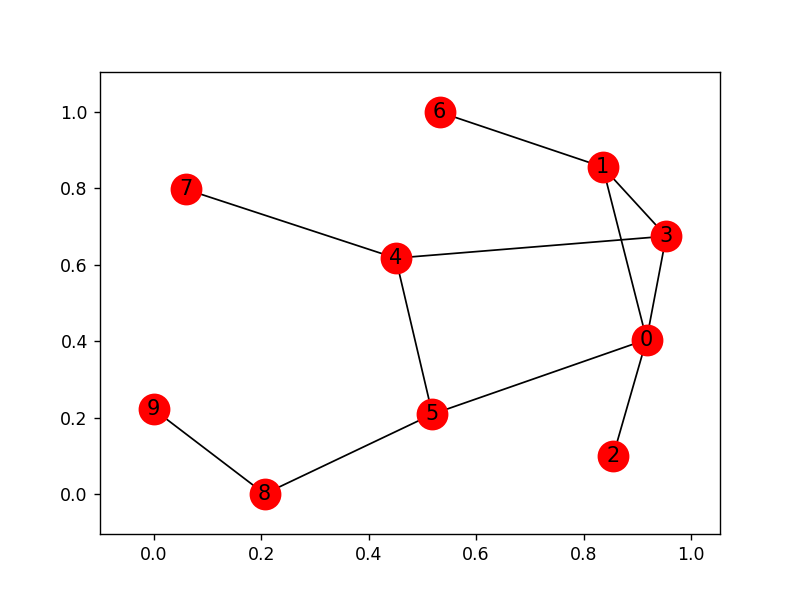

In [27]:
import networkx as nx
import numpy as np
import pandas as pd
%matplotlib notebook

G1 = nx.Graph()
G1.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

nx.draw_networkx(G1)

### Now let's take a look at how this graph looks like in a few different file formats and how to read each of these.
### 1. Adjacency List
- This format consists of lines with node labels. The first label in each line is the source node. All subsequent labels correspond to connected target nodes.For example, looking at the first line of G_adjlist.txt, we can see nodes 1, 2, 3, and 5 are all connected to node 0.

- Note that each line only adds nodes that weren't in previous lines as source nodes. For instance, in the second line of G_adjlist.txt, node 0 is not included because the connection between node 0 and 1 has already been accounted for.

In [28]:
!cat G_adjlist.txt

0 1 2 3 5
1 3 6
2
3 4
4 5 7
5 8
6
7
8 9
9


- We can read in a graph in this format using NetworkX's read_adjlist function.We can also pass int to node type to make sure the nodes are read in as integers instead of this functions default, strings.

- Looking at the edges, we can see that these match up with our initialization of G1 above.

In [31]:
G2 = nx.read_adjlist('G_adjlist.txt' , nodetype = int)
G2.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 3),
 (1, 6),
 (3, 4),
 (5, 4),
 (5, 8),
 (4, 7),
 (8, 9)]

### 2. Adjacency Matrix.
- The next format is called an adjacency matrix. Each element in the matrix indicates whether pairs of vertices are adjacent. For example, looking at NumPy array G_mat Node 0, corresponding to the first row of the array is adjacent to nodes 1, 2, 3, and 5.


- If this were a multigraph, we would see numbers larger than 1 in this matrix, indicating the number of edges between a pair of nodes.

In [32]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G_mat

array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [33]:
G3 = nx.Graph(G_mat)
G3.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 3),
 (1, 6),
 (3, 4),
 (4, 5),
 (4, 7),
 (5, 8),
 (8, 9)]

### 3. Edgelist.

- The edgelist format is useful for graphs with simple edge attributes and without node attributes.This format is not good for networks with isolated nodes.Looking at the G_edgelist file, the first two columns might look familiar. Those are the node pairs corresponding to edges of the graph from above.


- But notice in this format, we can have additional columns for edge attributes.For example, we can see the edge from node 0 to node 1 has a weight of 4.To load this graph in, we can use the **read_edgelist** function.The **data parameter** expects a list of tuples with names and types for edge data.


- Looking at this graph's edges, we can see that we've successfully loaded this graph including the weights.Note **the type of the node in this example, the node is of type string instead of integer**.Be careful as this might be different than what you are expecting, as each of these functions may have different defaults.

In [34]:
!cat G_edgelist.txt

0 1 4
0 2 3
0 3 2
0 5 6
1 3 2
1 6 5
3 4 3
4 5 1
4 7 2
5 8 6
8 9 1


In [39]:
G4 = nx.read_edgelist('G_edgelist.txt' , data=[('weight',int)])
# why? data = [('weight',int)] to make it able to consider the last
# column as weight and to avoid this error:
# TypeError: Failed to convert edge data (['4']) to dictionary.
G4.edges(data=True)

[('0', '1', {'weight': 4}),
 ('0', '2', {'weight': 3}),
 ('0', '3', {'weight': 2}),
 ('0', '5', {'weight': 6}),
 ('1', '3', {'weight': 2}),
 ('1', '6', {'weight': 5}),
 ('3', '4', {'weight': 3}),
 ('5', '4', {'weight': 1}),
 ('5', '8', {'weight': 6}),
 ('4', '7', {'weight': 2}),
 ('8', '9', {'weight': 1})]

### 4. Pandas DataFrame.

In [40]:
G_df = pd.read_csv('G_edgelist.txt' , delim_whitespace=True,
                   header = None , names= ['n1','n2','weight'])
G_df

n1  n2  weight
0    0   1       4
1    0   2       3
2    0   3       2
3    0   5       6
4    1   3       2
5    1   6       5
6    3   4       3
7    4   5       1
8    4   7       2
9    5   8       6
10   8   9       1

In [41]:
G5 = nx.from_pandas_dataframe(G_df,'n1','n2',edge_attr='weight')
G5.edges(data=True)

[(0, 1, {'weight': 4}),
 (0, 2, {'weight': 3}),
 (0, 3, {'weight': 2}),
 (0, 5, {'weight': 6}),
 (1, 3, {'weight': 2}),
 (1, 6, {'weight': 5}),
 (3, 4, {'weight': 3}),
 (5, 4, {'weight': 1}),
 (5, 8, {'weight': 6}),
 (4, 7, {'weight': 2}),
 (8, 9, {'weight': 1})]

#   Chess Example. 
Now let's load in a more complex graph and perform some basic analysis on it.

We will be looking at chess_graph.txt, which is a directed graph of chess games in edge list format.

1. Each node corresponds to a chess player and a directed edge represents a game. With the white player in the first column having an outgoing edge, and the black player in the second column having an incoming edge.

2. The weight of the edge in the third column represents the outcome. 1 for white win, 0 for draw, and -1 for black win.

3. The data file also includes a column of approximate timestamps in the fourth column for when the games were played.

        - We're also going to tell the function that we want to create the network using a multi-directed graph. This is important because, otherwise, the function will use the default un-directed graph, and direction, and additional edges will be lost.

In [42]:
!head -5 chess_graph.txt

1 2 0	885635999.999997
1 3 0	885635999.999997
1 4 0	885635999.999997
1 5 1	885635999.999997
1 6 0	885635999.999997


In [44]:
chess = nx.read_edgelist('chess_graph.txt' , data=[('outcome',int),
                                                ('timestamp',float)],
                                        create_using = nx.MultiDiGraph())
# check if it's directed / multiedges graph
chess.is_directed() , chess.is_multigraph()

(True, True)

In [45]:
chess.edges(data=True)

[('1', '2', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '3', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '4', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '5', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('1', '6', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '807', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('1', '454', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('1', '827', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('1', '1240', {'outcome': 0, 'timestamp': 906660000.0}),
 ('1', '680', {'outcome': 0, 'timestamp': 906660000.0}),
 ('1', '166', {'outcome': -1, 'timestamp': 906660000.0}),
 ('1', '1241', {'outcome': 0, 'timestamp': 906660000.0}),
 ('1', '1242', {'outcome': 0, 'timestamp': 906660000.0}),
 ('1', '808', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('1', '819', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('1', '448', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('1', '1214', {'outcome': 0, 'timestam

## Now let's find out which player played the most games in our network.

## Method 1:
**by looking at the degree or number of edges of each node.**

- The great function returns a dictionary of the number of edges connected to each node.

- Note that this is a directed network, and the degree function returns the sum of both in degree, the number of incoming edges, and out degree, the number of outgoing edges.



In [46]:
games_played = chess.degree()
games_played

{'1': 48,
 '2': 112,
 '3': 85,
 '4': 12,
 '5': 18,
 '6': 95,
 '7': 9,
 '8': 20,
 '9': 142,
 '10': 4,
 '11': 2,
 '12': 70,
 '13': 148,
 '14': 153,
 '15': 23,
 '16': 3,
 '17': 115,
 '18': 45,
 '19': 27,
 '20': 12,
 '21': 65,
 '22': 6,
 '23': 41,
 '24': 72,
 '25': 72,
 '26': 2,
 '27': 3,
 '28': 41,
 '29': 8,
 '30': 115,
 '31': 23,
 '32': 146,
 '33': 67,
 '34': 52,
 '35': 22,
 '36': 118,
 '37': 30,
 '38': 39,
 '39': 79,
 '40': 26,
 '41': 71,
 '42': 200,
 '43': 10,
 '44': 77,
 '45': 74,
 '46': 41,
 '47': 92,
 '48': 45,
 '49': 58,
 '50': 9,
 '51': 90,
 '52': 4,
 '53': 167,
 '54': 80,
 '55': 35,
 '56': 87,
 '57': 48,
 '58': 29,
 '59': 111,
 '60': 43,
 '61': 107,
 '62': 74,
 '63': 7,
 '64': 171,
 '65': 43,
 '66': 203,
 '67': 39,
 '68': 23,
 '69': 4,
 '70': 15,
 '71': 55,
 '72': 10,
 '73': 19,
 '74': 144,
 '75': 22,
 '76': 20,
 '77': 71,
 '78': 18,
 '79': 122,
 '80': 4,
 '81': 29,
 '82': 29,
 '83': 58,
 '84': 32,
 '85': 35,
 '86': 13,
 '87': 52,
 '88': 61,
 '89': 123,
 '90': 58,
 '91': 100,
 '9

In [55]:
max_value = max(games_played.values())
max_key = [i for i in games_played.keys() if games_played[i] == max_value]

print((max_key,max_value))
print('player num {} played {} games'.format(max_key[0],max_value))

(['461'], 280)
player num 461 played 280 games


## Method 2:
**What is the player num that won the most num of games?**

Note : `Using pandas DataFrame`


In [93]:
df = pd.DataFrame(chess.edges(data=True) , columns = ['white','black',
                                                   'outcome'])
df.head()

white black                                        outcome
0     1     2  {'outcome': 0, 'timestamp': 885635999.999997}
1     1     3  {'outcome': 0, 'timestamp': 885635999.999997}
2     1     4  {'outcome': 0, 'timestamp': 885635999.999997}
3     1     5  {'outcome': 1, 'timestamp': 885635999.999997}
4     1     6  {'outcome': 0, 'timestamp': 885635999.999997}

In [94]:
list(map(lambda x: x['outcome'],df['outcome']))[:10]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [95]:
df['outcome'] = df['outcome'].map(lambda x: x['outcome'])
df.head()

white black  outcome
0     1     2        0
1     1     3        0
2     1     4        0
3     1     5        1
4     1     6        0

1. Now let's find the number of times a player 1 is white by finding where outcome is 1, grouping by white, and summing all those values. Similarly, to find the number of times a player 1 is black, we look at where outcome is -1 groupby black sum the values, and multiply by -1.

2. To find the win count, we add up the number of times a player won is white, and is black.

3. We can use the add function, and pass in a fill value of 0. Which will set missing values to 0 to let us find the number of games won for players that happen to only play as black or as white.

4. Using nlargest on our win count dataframe, we find the players that won the most games, with player 330 having won the most games at 109.

In [96]:
won_as_white = df[df['outcome'] == 1] .groupby('white').sum()
won_as_white.head()

outcome
white         
1            4
100          4
1002         1
1003         4
1005         5

In [97]:
won_as_black = df[df['outcome'] == -1] .groupby('black').sum()
print(won_as_black.head())

# i need to *(-1) because `-1+(-1)=-2`
won_as_black = -1*won_as_black
won_as_black.head()

       outcome
black         
1           -3
100         -3
1000        -1
1003        -1
1005        -8


outcome
black         
1            3
100          3
1000         1
1003         1
1005         8

In [98]:
# get the `total num each player won` whether he was white or black.
# we'll use add() passing fill_value = 0 which will set missing value to 0. 
win_count = won_as_white.add(won_as_black, fill_value=0)
win_count.head()

outcome
1         7.0
100       7.0
1000      1.0
1002      1.0
1003      5.0

In [99]:
# now we'll use nlargest() to find the largest num in outcome col.
win_count.nlargest(5,'outcome')

outcome
330    109.0
467    103.0
98      94.0
456     88.0
461     88.0